In [2]:
%matplotlib Widget

import sampling
import modeling

import importlib
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:02<00:00,  2.36it/s]


Text(0.5, 1.0, 'Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions')

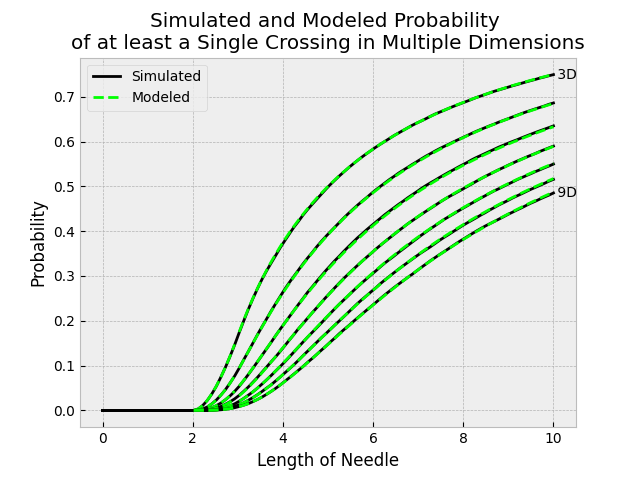

In [88]:
importlib.reload(sampling)

samples = 100000
dims = np.arange(3, 10, 1)
lengths = np.linspace(0, 10, 100)
hyperplanes = 1
spacing = np.array([1])
c = 3
s0 = spacing[0]

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):

    xs = np.random.random((samples, dim))
    hypersphere = sampling.get_samples_gaussian(samples, dim)
    sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
    # sim_probs = sampling.get_sim_prob_e(samples, dim, lengths, c, hyperplanes, spacing)

    ax.plot(lengths, sim_probs, "k")

    # modeled_prob = modeling.prob_of_crossing_vs_length(lengths, dim, N=hyperplanes)
    # ax.plot(lengths, modeled_prob, "--", color=(0, 1, 0))

    r = lengths
    r_ml = r[r>spacing[0]*(c-1)]
    gamma = s0*(c-1)/r_ml
    loop_sum_1 = np.sum([spec.beta((dim-2*i)/2, 0.5)/(1-gamma**2)**i for i in range(1, int((dim-2)/2)+1)], axis=0)

    r_l = r[r>spacing[0]*c]
    gamma_2 = s0*c/r_l
    loop_sum_2 = np.sum([spec.beta((dim-2*i)/2, 0.5)/(1-gamma_2**2)**i for i in range(1, int((dim-2)/2)+1)], axis=0)

    if dim%2 == 0:
        modeled_prob_m = r_ml/(np.pi*s0) * ((1-gamma**2)**((dim-1)/2)*(spec.beta(dim/2, 0.5) + gamma**2*loop_sum_1) - 2*gamma*np.arccos(gamma))
        modeled_prob_l_correction = r_l/(np.pi*s0) * ((1-gamma_2**2)**((dim-1)/2)*(spec.beta(dim/2, 0.5) + gamma_2**2*loop_sum_2) - 2*gamma_2*np.arccos(gamma_2))
    if dim%2 == 1:
        modeled_prob_m = r_ml/(np.pi*s0) * ((1-gamma**2)**((dim-1)/2)*(spec.beta(dim/2, 0.5) + gamma**2*loop_sum_1) - np.pi*gamma*(1-gamma))
        modeled_prob_l_correction = r_l/(np.pi*s0) * ((1-gamma_2**2)**((dim-1)/2)*(spec.beta(dim/2, 0.5) + gamma_2**2*loop_sum_2) - np.pi*gamma_2*(1-gamma_2))

    modeled_prob_l = modeled_prob_m[r_ml>spacing[0]*c] - modeled_prob_l_correction

    ax.plot(r_l, modeled_prob_l, "--", color=(0, 1, 0))
    ax.plot(r_ml[r_ml<s0*c], modeled_prob_m[r_ml<s0*c], "--", color=(0, 1, 0))

    # if dim%2 == 1:
    #     ax.plot(r, modeled_prob, "--", color=(0, 1, 0))

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
    # ax.plot(lengths[lengths<1], lengths[lengths<1]*spec.gamma(dim/2)/spec.gamma(0.5)/spec.gamma(dim/2+0.5))
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
ax.set_title("Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions")


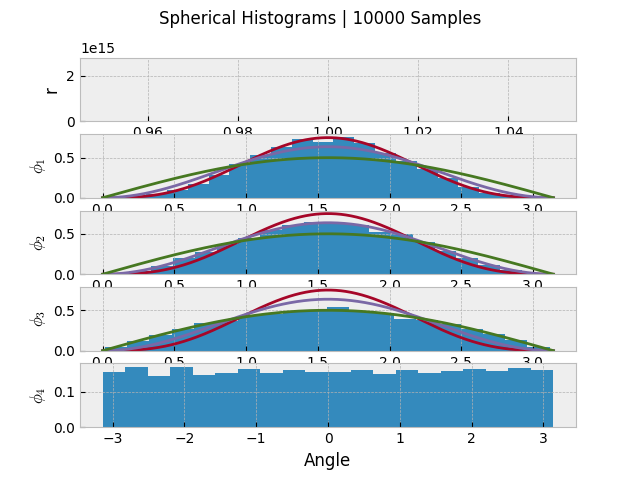

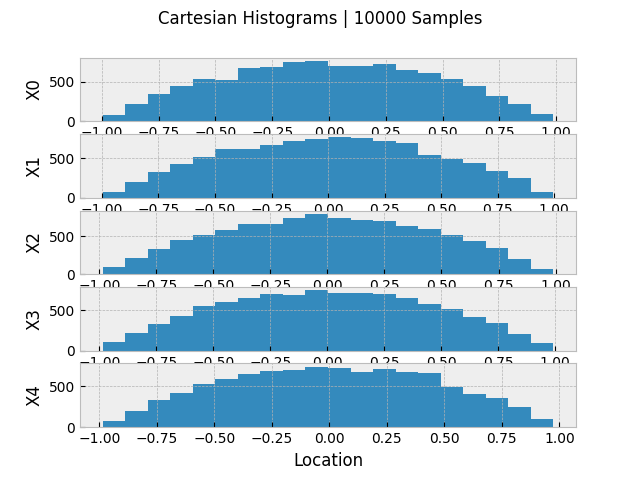

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)